## Installing and downloading the required libraries

In [1]:
!sudo apt install -y fluidsynth

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin
  libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5
  libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1
  libxkbcommon-x11-0 qsynth qt5-gtk-platformtheme qttranslations5-l10n
  timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs qt5-image-formats-plugins qtwayland5 jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libevdev2 libfluidsynth3 libgudev-1.0-0
  libinput-bin libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libx

In [2]:
!pip install --upgrade pyfluidsynth

  Preparing metadata (setup.py) ... done
  Created wheel for pyfluidsynth: filename=pyFluidSynth-1.3.3-py3-none-any.whl size=19185 sha256=378667f04be8a5c57f0630d2a535a155d021508094b471b4a486437054d53679
  Stored in directory: /root/.cache/pip/wheels/e6/9c/2b/b4b194cbb100d6f20136a22b2f76cd329b1a21139ed26c9775
Successfully built pyfluidsynth


In [3]:
!pip install pretty_midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.3 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592289 sha256=f469cace7df89a84e7ed4d3fa05f5dd4b432bdc3cd96a6525818140512c24730
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [4]:
import collections
import datetime
import fluidsynth
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from typing import Optional

Initialize text and sampling rate: Sampling rate, also known as sampling frequency, is the number of samples taken per second to convert an analog audio source into a digital file.

In [34]:
seed = 80
tf.random.set_seed(seed)
np.random.seed(seed)

# Sampling rate for audio playback
_SAMPLING_RATE = 16000

Get the maestro v2 dataset, which contains 1282 classical music MIDI(Musical Instrument Digital Interface) files.

In [16]:
data_dir = pathlib.Path('data/maestro-v2.0.0')
if not data_dir.exists():
  tf.keras.utils.get_file(
      'maestro-v2.0.0-midi.zip',
      origin='https://storage.googleapis.com/magentadata/datasets/maestro/v2.0.0/maestro-v2.0.0-midi.zip',
      extract=True,
      cache_dir='.', cache_subdir='data',
  )

In [17]:
filenames = glob.glob(str(data_dir/'**/*.mid*'))
print('Number of files:', len(filenames))

Number of files: 1282


In [22]:
sample_file = filenames[2]
print(sample_file)

data/maestro-v2.0.0/2013/ORIG-MIDI_01_7_6_13_Group__MID--AUDIO_01_R1_2013_wav--4.midi


In [23]:
pm = pretty_midi.PrettyMIDI(sample_file)

Function to display/play an audio.

In [35]:
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [36]:
display_audio(pm)

Get the details of each instrument

In [37]:
print('Number of instruments:', len(pm.instruments))
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
print('Instrument name:', instrument_name)

Number of instruments: 1
Instrument name: Acoustic Grand Piano


Get the pitch, note, and duration for each note

Pitch : the quality of a sound governed by the rate of vibrations producing it; the degree of highness or lowness of a tone

Note: a single tone of definite pitch made by a musical instrument or the human voice

Duration: Time the instrument played the specified note for

In [39]:
for i, note in enumerate(instrument.notes[:10]):
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')

0: pitch=36, note_name=C2, duration=0.0417
1: pitch=24, note_name=C1, duration=0.0417
2: pitch=48, note_name=C3, duration=0.0352
3: pitch=43, note_name=G2, duration=0.0378
4: pitch=31, note_name=G1, duration=0.0404
5: pitch=55, note_name=G3, duration=0.0833
6: pitch=41, note_name=F2, duration=0.0469
7: pitch=29, note_name=F1, duration=0.0430
8: pitch=53, note_name=F3, duration=0.0820
9: pitch=27, note_name=D#1, duration=0.0443


Generate a dataframe of pitch, notes, duration from the audio file

In [42]:
def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [43]:
raw_notes = midi_to_notes(sample_file)
raw_notes.head()

,pitch,start,end,step,duration
0,36,0.997396,1.039062,0.000000,0.041667
1,24,1.003906,1.045573,0.006510,0.041667
2,48,1.097656,1.132812,0.093750,0.035156
3,43,1.187500,1.225260,0.089844,0.037760
4,31,1.190104,1.230469,0.002604,0.040365


In [44]:
get_note_names = np.vectorize(pretty_midi.note_number_to_name)
sample_note_names = get_note_names(raw_notes['pitch'])
sample_note_names[:10]

array(['C2', 'C1', 'C3', 'G2', 'G1', 'G3', 'F2', 'F1', 'F3', 'D#2'],
      dtype='<U3')

In [55]:
key_order = ['pitch', 'step', 'duration']
train_notes = np.stack([raw_notes[key] for key in key_order], axis=1)
train_notes

array([[3.60000000e+01, 0.00000000e+00, 4.16666667e-02],
       [2.40000000e+01, 6.51041667e-03, 4.16666667e-02],
       [4.80000000e+01, 9.37500000e-02, 3.51562500e-02],
       ...,
       [2.40000000e+01, 3.90625000e-03, 4.17447917e+00],
       [4.30000000e+01, 0.00000000e+00, 4.23437500e+00],
       [2.60000000e+01, 5.98958333e-02, 1.30208333e-03]])

Creating a Tensorflow dataset again from the dataframe.

In [58]:
notes_ds = tf.data.Dataset.from_tensor_slices(train_notes)
notes_ds.element_spec

TensorSpec(shape=(3,), dtype=tf.float64, name=None)

Prepare dataset for RNN Training.

In [59]:
def create_sequences(
    dataset: tf.data.Dataset,
    seq_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
  """Returns TF Dataset of sequence and label examples."""
  seq_length = seq_length+1

  # Take 1 extra for the labels
  windows = dataset.window(seq_length, shift=1, stride=1,
                              drop_remainder=True)

  # `flat_map` flattens the" dataset of datasets" into a dataset of tensors
  flatten = lambda x: x.batch(seq_length, drop_remainder=True)
  sequences = windows.flat_map(flatten)

  # Normalize note pitch
  def scale_pitch(x):
    x = x/[vocab_size,1.0,1.0]
    return x

  # Split the labels
  def split_labels(sequences):
    inputs = sequences[:-1]
    labels_dense = sequences[-1]
    labels = {key:labels_dense[i] for i,key in enumerate(key_order)}

    return scale_pitch(inputs), labels

  return sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)

In [73]:
seq_length = 64
vocab_size = 128
seq_ds = create_sequences(notes_ds, seq_length, vocab_size)
seq_ds.element_spec

(TensorSpec(shape=(64, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})

In [74]:
for seq, target in seq_ds.take(1):
  print('sequence shape:', seq.shape)
  print('sequence elements (first 10):', seq[0: 10])
  print()
  print('target:', target)

sequence shape: (64, 3)
sequence elements (first 10): tf.Tensor(
[[0.28125    0.         0.04166667]
 [0.1875     0.00651042 0.04166667]
 [0.375      0.09375    0.03515625]
 [0.3359375  0.08984375 0.03776042]
 [0.2421875  0.00260417 0.04036458]
 [0.4296875  0.05078125 0.08333333]
 [0.3203125  0.109375   0.046875  ]
 [0.2265625  0.01302083 0.04296875]
 [0.4140625  0.04296875 0.08203125]
 [0.3046875  0.12239583 0.05859375]], shape=(10, 3), dtype=float64)

target: {'pitch': <tf.Tensor: shape=(), dtype=float64, numpy=48.0>, 'step': <tf.Tensor: shape=(), dtype=float64, numpy=0.035156249999999556>, 'duration': <tf.Tensor: shape=(), dtype=float64, numpy=0.05859375>}


In [75]:
n_notes = len(raw_notes)
batch_size = 128
buffer_size = n_notes - seq_length  # the number of items in the dataset
train_ds = (seq_ds
            .shuffle(buffer_size)
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))

In [76]:
train_ds.element_spec

(TensorSpec(shape=(128, 64, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(128,), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(128,), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(128,), dtype=tf.float64, name=None)})

Error function definition: Positive pressure penalizes -ve predictions.

In [77]:
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
  mse = (y_true - y_pred) ** 2
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mse + positive_pressure)

Training the model

In [105]:
#Setting hyperparameters

input_shape = (seq_length, 3)
learning_rate = 0.05

inputs = tf.keras.Input(input_shape)
x = tf.keras.layers.LSTM(128)(inputs)

outputs = {
  'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
}

model = tf.keras.Model(inputs, outputs)

#SparseCategoricalCrossentropy is a commonly used loss function in classification tasks, particularly when dealing with integer-encoded target labels (i.e., sparse labels).

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
}


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss, optimizer=optimizer)

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 64, 3)]              0         []                            
                                                                                                  
 lstm_4 (LSTM)               (None, 128)                  67584     ['input_5[0][0]']             
                                                                                                  
 duration (Dense)            (None, 1)                    129       ['lstm_4[0][0]']              
                                                                                                  
 pitch (Dense)               (None, 128)                  16512     ['lstm_4[0][0]']              
                                                                                            

In [106]:
losses = model.evaluate(train_ds, return_dict=True)
losses

47/47 [==============================] - 2s 6ms/step - loss: 5.4345 - duration_loss: 0.5058 - pitch_loss: 4.8549 - step_loss: 0.0739


{'loss': 5.434523582458496,
 'duration_loss': 0.5057722330093384,
 'pitch_loss': 4.854868412017822,
 'step_loss': 0.07388319820165634}

In [107]:
model.compile(
    loss=loss,
    loss_weights={
        'pitch': 1.0,
        'step': 0.002,
        'duration':0.06,
    },
    optimizer=optimizer,
)

In [108]:
model.evaluate(train_ds, return_dict=True)

47/47 [==============================] - 1s 5ms/step - loss: 4.8854 - duration_loss: 0.5058 - pitch_loss: 4.8549 - step_loss: 0.0739


{'loss': 4.885363578796387,
 'duration_loss': 0.5057722330093384,
 'pitch_loss': 4.854868412017822,
 'step_loss': 0.07388319820165634}

Add additional model weight saving at specified checkpoints.

In [109]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./training_checkpoints/ckpt_{epoch}',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]

In [112]:
%%time
epochs = 40

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/40
47/47 [==============================] - 0s 10ms/step - loss: 2.9390 - duration_loss: 0.0185 - pitch_loss: 2.9378 - step_loss: 0.0154
Epoch 2/40
47/47 [==============================] - 0s 8ms/step - loss: 2.8217 - duration_loss: 0.0161 - pitch_loss: 2.8207 - step_loss: 0.0125
Epoch 3/40
47/47 [==============================] - 0s 9ms/step - loss: 2.7758 - duration_loss: 0.0154 - pitch_loss: 2.7749 - step_loss: 0.0112
Epoch 4/40
47/47 [==============================] - 0s 10ms/step - loss: 2.7410 - duration_loss: 0.0150 - pitch_loss: 2.7401 - step_loss: 0.0105
Epoch 5/40
47/47 [==============================] - 0s 10ms/step - loss: 2.7120 - duration_loss: 0.0149 - pitch_loss: 2.7111 - step_loss: 0.0100
Epoch 6/40
47/47 [==============================] - 0s 10ms/step - loss: 2.6973 - duration_loss: 0.0147 - pitch_loss: 2.6964 - step_loss: 0.0099
Epoch 7/40
47/47 [==============================] - 0s 8ms/step - loss: 2.6811 - duration_loss: 0.0146 - pitch_loss: 2.6802 - step_l

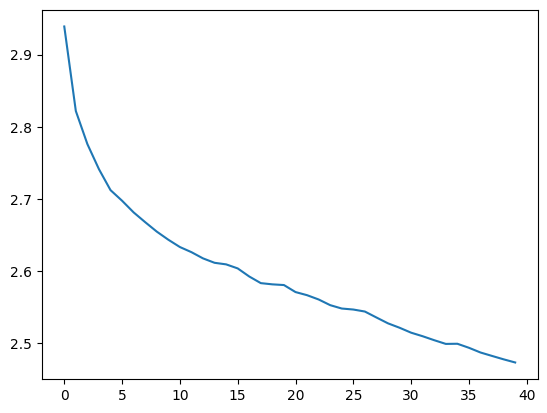

In [113]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.show()

In [114]:
def predict_next_note(
    notes: np.ndarray,
    model: tf.keras.Model,
    temperature: float = 1.0) -> tuple[int, float, float]:
  """Generates a note as a tuple of (pitch, step, duration), using a trained sequence model."""

  assert temperature > 0

  # Add batch dimension
  inputs = tf.expand_dims(notes, 0)

  predictions = model.predict(inputs)
  pitch_logits = predictions['pitch']
  step = predictions['step']
  duration = predictions['duration']

  pitch_logits /= temperature
  pitch = tf.random.categorical(pitch_logits, num_samples=1)
  pitch = tf.squeeze(pitch, axis=-1)
  duration = tf.squeeze(duration, axis=-1)
  step = tf.squeeze(step, axis=-1)

  # `step` and `duration` values should be non-negative
  step = tf.maximum(0, step)
  duration = tf.maximum(0, duration)

  return int(pitch), float(step), float(duration)

In [133]:
temperature = 12
num_predictions = 128

sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

# The initial sequence of notes; pitch is normalized similar to training
# sequences
input_notes = (
    sample_notes[:seq_length] / np.array([vocab_size, 1, 1]))

generated_notes = []
prev_start = 0
for _ in range(num_predictions):
  pitch, step, duration = predict_next_note(input_notes, model, temperature)
  start = prev_start + step
  end = start + duration
  input_note = (pitch, step, duration)
  generated_notes.append((*input_note, start, end))
  input_notes = np.delete(input_notes, 0, axis=0)
  input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
  prev_start = start

generated_notes = pd.DataFrame(
    generated_notes, columns=(*key_order, 'start', 'end'))

1/1 [==============================] - 0s 18ms/step


In [134]:
generated_notes.head(10)

,pitch,step,duration,start,end
0,76,0.045389,0.088820,0.045389,0.134210
1,117,0.123015,0.189313,0.168405,0.357718
2,13,0.129474,0.184267,0.297878,0.482145
3,48,0.163104,0.186494,0.460982,0.647477
4,75,0.120358,0.194380,0.581340,0.775720
5,38,0.125821,0.192375,0.707161,0.899535
6,67,0.118111,0.201130,0.825272,1.026402
7,42,0.129605,0.190968,0.954877,1.145845
8,14,0.128896,0.199214,1.083773,1.282987
9,80,0.160084,0.194359,1.243857,1.438216


In [135]:
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str,
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm

In [136]:
out_file = 'output.mid'
out_pm = notes_to_midi(
    generated_notes, out_file=out_file, instrument_name=instrument_name)
display_audio(out_pm)